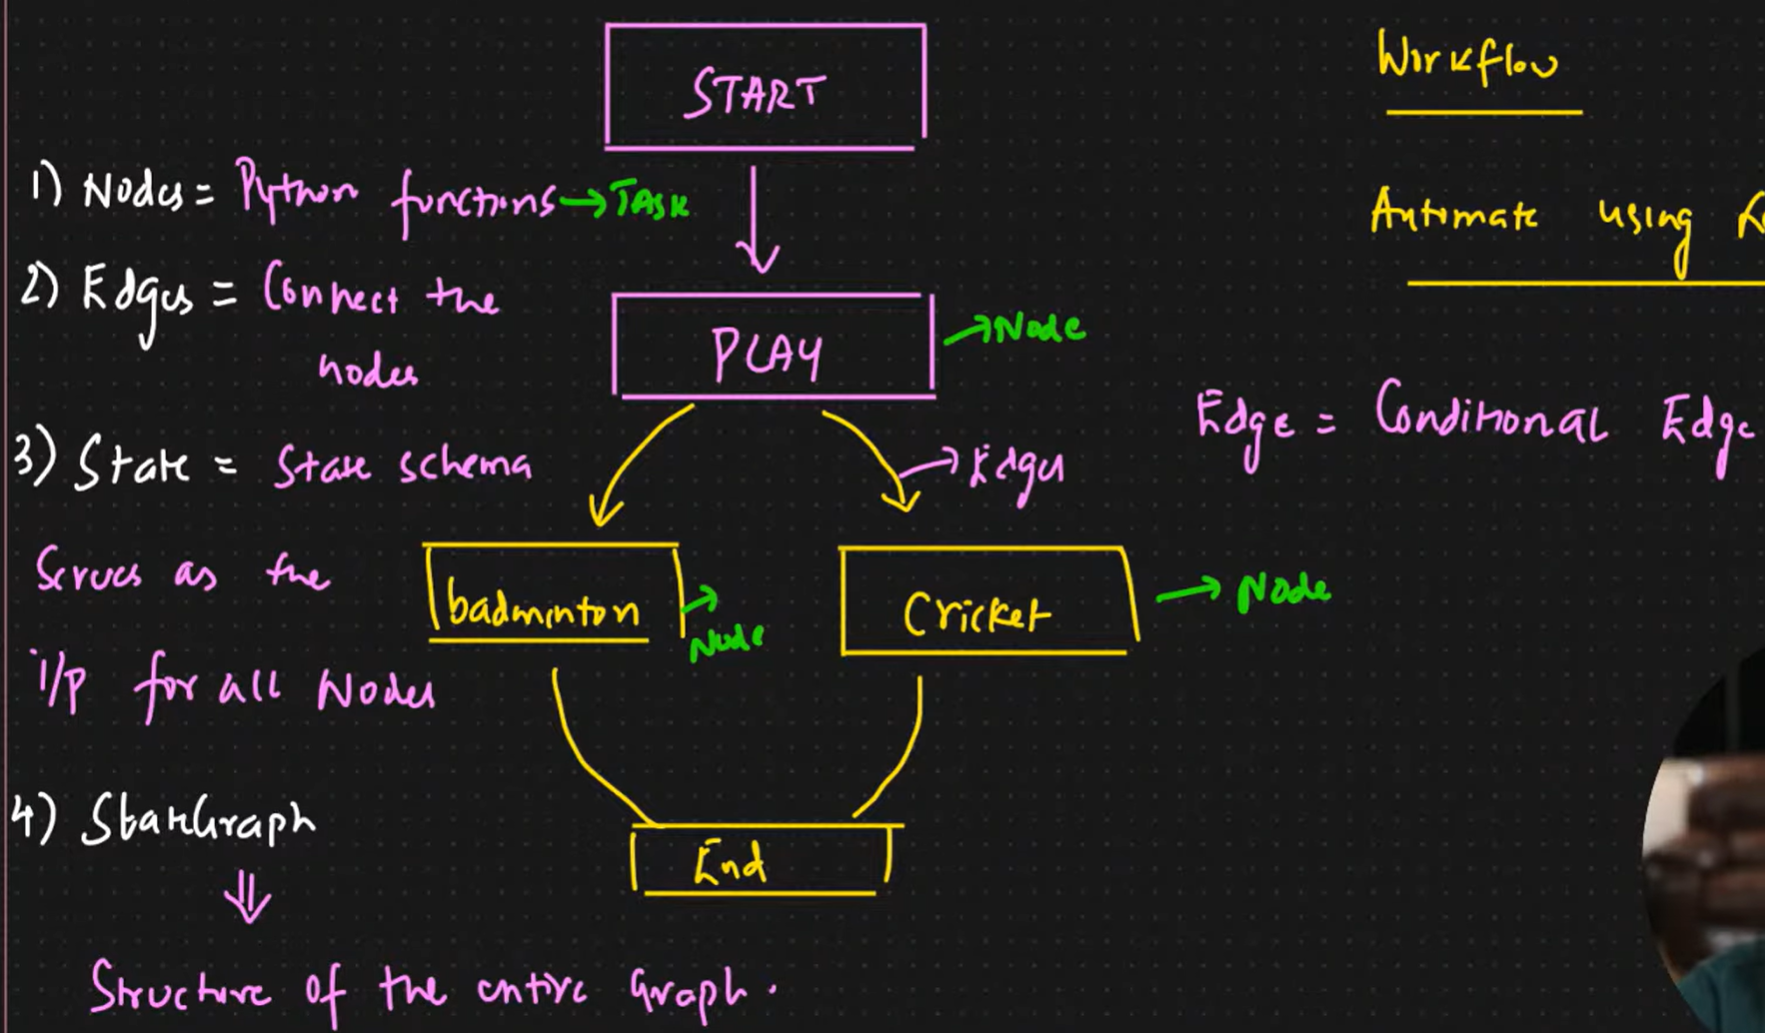

In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str

In [ ]:
#1st node
def start_play(state:State):
    print("Start_play node is executed")
    return{"graph_info":state["graph_info"]+" i'm planning to play "}  #Once this nodes get updates, 'I'm in start_play' will get updated in 'graph_info'.

#2nd node
def cricket(state:State):
    print("Cricket node is executed")
    return{"graph_info":state["graph_info"]+"Cricket."}     #Once this nodes get updates, 'Cricket' will get updated along with 1st node

#3rd node
def badminton(state:State):
    print("Badminton node is executed")
    return{"graph_info":state["graph_info"]+"Badminton."}   #Once this nodes get updates, 'Badminton' will get updated along with 1st node

Whenever the nodes get execute the graph_info should get updated based on that particular note

This functions(Node) decide where to go after play

In [12]:
import random
from typing import Literal  # To specify return type like where to go next badminton or cricket

def random_play(state:State)->Literal["cricket","badminton"]:
    if random.random()>0.5:
        return "cricket"
    else:
        return "badminton"

Construct the entire graph

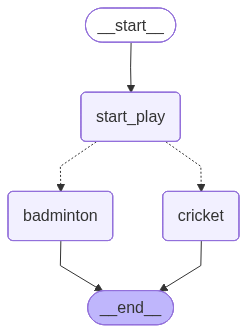

In [13]:
from IPython.display import display,Image
from langgraph.graph import StateGraph, START, END

## Build Graph
graph=StateGraph(State)

## Add nodes
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

## Schedule the flow of graph (Add edges)
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play) #start_play will call random_play function to decide next node
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

## Compile the graph
graph_builder= graph.compile()

## Visualize the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [14]:
# Execute the graph
graph_builder.invoke({"graph_info":"My name is Sam"})

Start_play node is executed
Cricket node is executed


{'graph_info': "My name is Sam i'm planning to play Cricket."}